In [2]:
import pandas as pd
from pandas import Series, DataFrame
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline
from __future__ import division

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

In [5]:
for stock in tech_list:
    globals() [stock] = data.DataReader(stock,'yahoo',start, end)

In [13]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,113.472341,114.307778,112.796349,113.618611,3.355945e+07,112.745843
std,14.760771,14.747834,14.817686,14.829053,1.570238e+07,15.329147
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,101.987502,103.734998,101.832499,102.314999,2.415708e+07,100.806859
50%,111.244999,112.250000,110.300000,111.529999,2.918165e+07,110.734441
75%,118.802498,119.697502,118.375002,119.375000,3.643442e+07,118.859674
max,144.289993,145.460007,143.809998,144.770004,1.146021e+08,144.770004


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-04-15 to 2017-04-13
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


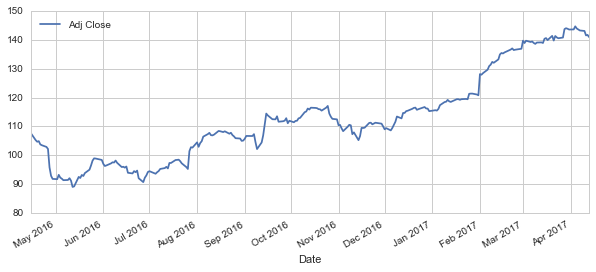

In [15]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

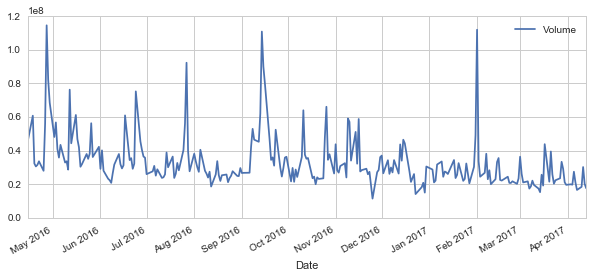

In [17]:
AAPL['Volume'].plot(legend=True, figsize = (10,4))

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = Series(AAPL['Adj Close']).rolling(ma).mean()

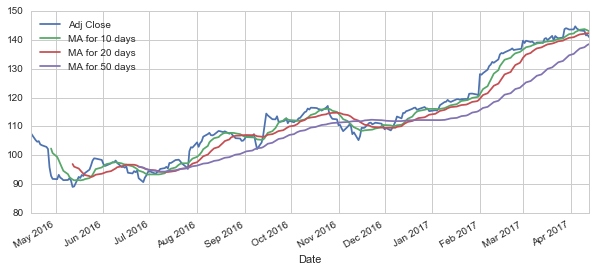

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

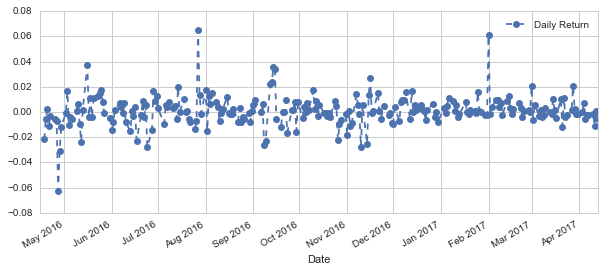

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

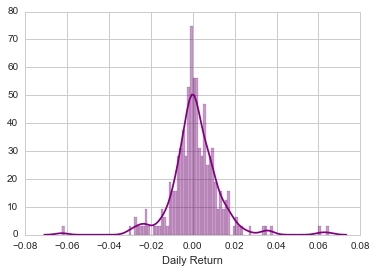

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(), bins= 100, color = 'purple' )

In [19]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [20]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-15,107.575818,625.890015,759.000000,54.223894
2016-04-18,105.254888,635.349976,766.609985,55.013135
2016-04-19,104.696689,627.900024,753.929993,54.944929
2016-04-20,104.912128,632.989990,752.669983,54.165431
2016-04-21,103.776147,631.000000,759.140015,54.350560


In [21]:
tech_rets = closing_df.pct_change()

In [22]:
tech_rets .head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-15,NaN,NaN,NaN,NaN
2016-04-18,-0.021575,0.015114,0.010026,0.014555
2016-04-19,-0.005303,-0.011726,-0.016540,-0.001240
2016-04-20,0.002058,0.008106,-0.001671,-0.014187
2016-04-21,-0.010828,-0.003144,0.008596,0.003418


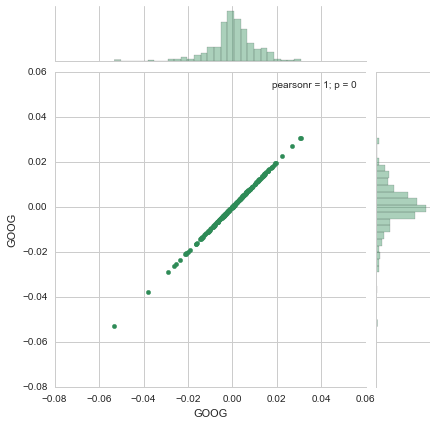

In [23]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

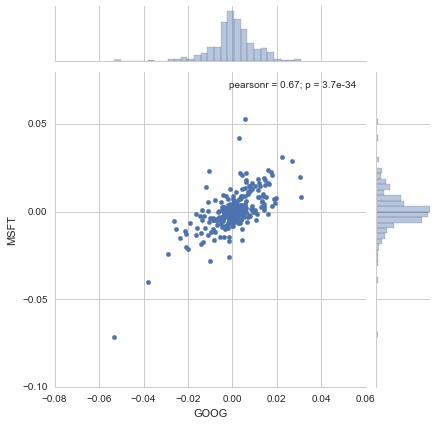

In [24]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

In [25]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-15,NaN,NaN,NaN,NaN
2016-04-18,-0.021575,0.015114,0.010026,0.014555
2016-04-19,-0.005303,-0.011726,-0.016540,-0.001240
2016-04-20,0.002058,0.008106,-0.001671,-0.014187
2016-04-21,-0.010828,-0.003144,0.008596,0.003418


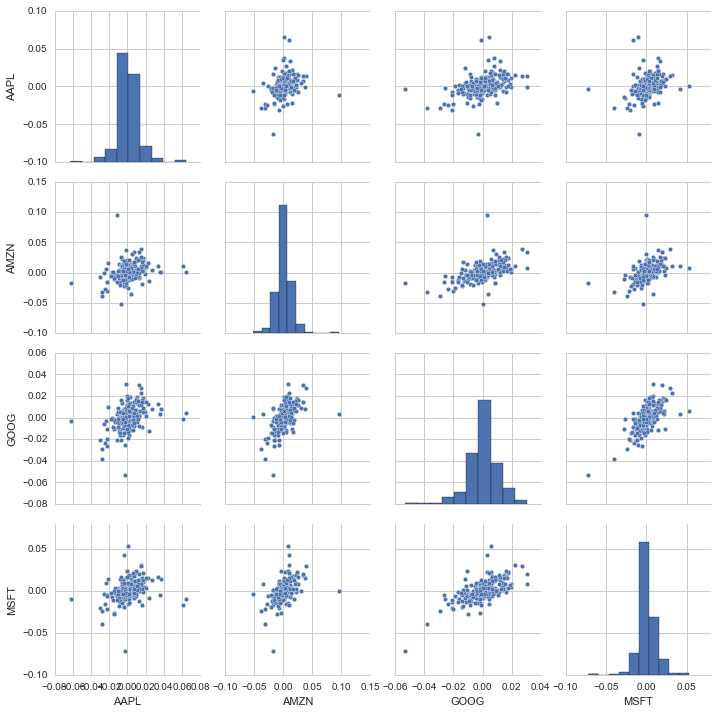

In [27]:
sns.pairplot(tech_rets.dropna())

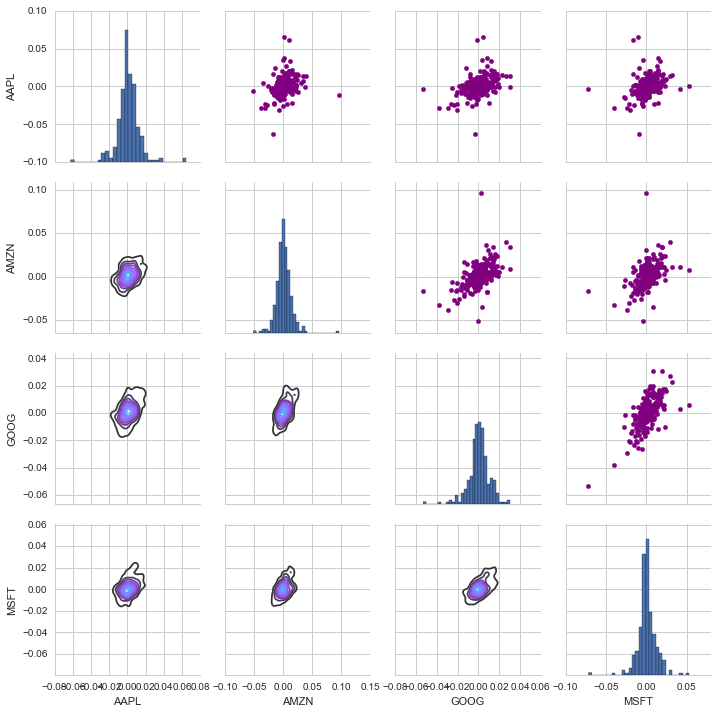

In [29]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

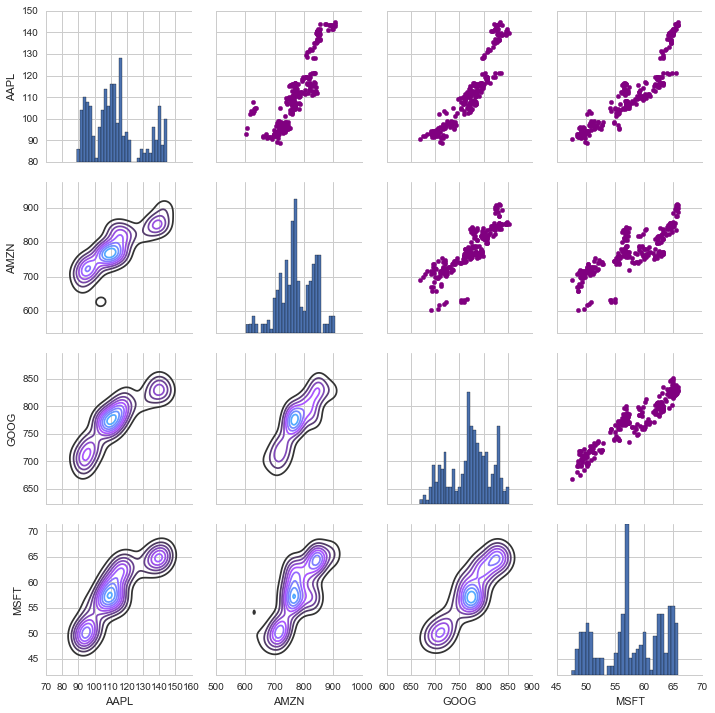

In [30]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

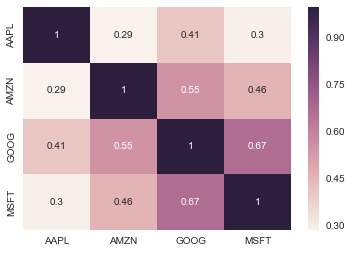

In [37]:
#sns.linearmodels.corrplot(tech_rets.dropna(), annot=True)
sns.heatmap(tech_rets.corr(), annot=True)

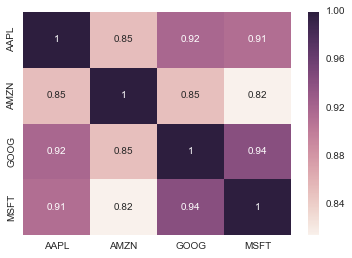

In [39]:
sns.heatmap(closing_df.corr(), annot=True)

In [ ]:
#Risk Analysis

In [42]:
rets = tech_rets.dropna()

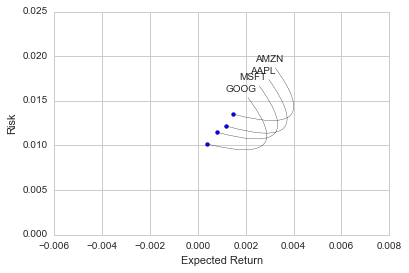

In [58]:
area = np.pi *5
plt.scatter(rets.mean(), rets.std() , s = area )
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-1.5'))

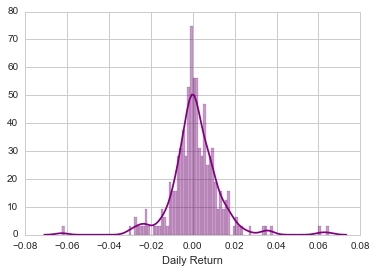

In [59]:
sns.distplot(AAPL['Daily Return'].dropna(), bins= 100, color = 'purple' )

In [60]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-18,-0.021575,0.015114,0.010026,0.014555
2016-04-19,-0.005303,-0.011726,-0.016540,-0.001240
2016-04-20,0.002058,0.008106,-0.001671,-0.014187
2016-04-21,-0.010828,-0.003144,0.008596,0.003418
2016-04-22,-0.002737,-0.016640,-0.053179,-0.071710


In [61]:
rets['AAPL'].quantile(0.05)

-0.01609844499806129

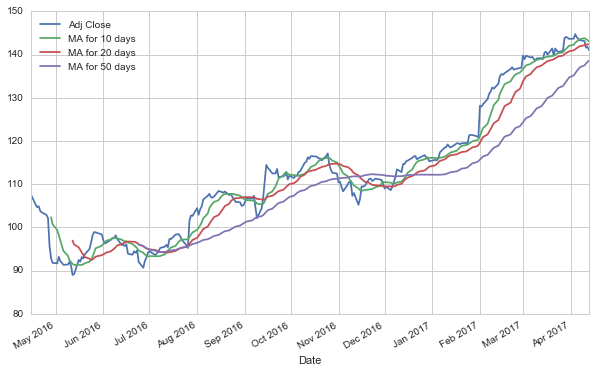

In [22]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,6))